In [1]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 
import cv2

def imread(filename):
    return np.array(Image.open(filename)).astype('float')

def imget(filename):
    return Image.open(filename)

def imshow(img):
    plt.imshow(img.astype(np.uint8))

def draw_mask(img, points, alpha=0.95):
    # mask = np.ones(img.shape) * 255
    mask = np.zeros(img.shape)
    mask[points[:, 1], points[:, 0], :] = (0, 0, 255)
    mask *= alpha
    _img = mask + img
    _img = np.clip(_img, 0, 255)
    imshow(_img)

def pointspooling(points, dowscale=16):
    _points = points.copy()
    _points = _points / dowscale 
    _points = _points.astype("int")
    _points = _points * dowscale 
    return _points 

points_path = "./data/1701153900630209_front_wide.npy"
img_path = "./data/1701153900630209_front_wide_undist.jpg"
points = np.load(points_path)
img = imread(img_path)
print(img.shape, points[:, 0].max(), points[:, 1].max())
x, y = points[:, 1], points[:, 0]

(2160, 3840, 3) 3839 2159


In [95]:
from torchvision import datasets
import numpy as np
from matplotlib import pyplot as plt
from mmengine.structures import PixelData
from mmseg.structures import SegDataSample
ROOT = "/root/datasets/COCO" 
IMAGES_PATH = "/root/datasets/COCO/train2017"
ANNOTATIONS_PATH = "/root/datasets/COCO/annotations/instances_train2017.json" 
dataset = datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH)
dataset = datasets.wrap_dataset_for_transforms_v2(dataset)

loading annotations into memory...
Done (t=27.94s)
creating index...
index created!


In [96]:
sample = dataset[0]
img, target = sample
sample = dataset[0]
img = sample[0]
masks = sample[1]['masks']
bbox = sample[1]['bbox']
print("img shape & masks shape: ", np.array(img).shape, masks.shape)
print(type(masks.data))


img shape & masks shape:  (480, 640, 3) torch.Size([8, 480, 640])
<class 'torch.Tensor'>


In [101]:
x, y, w, h = bbox[0]
img.crop(x,y,x+w,y+h)
Image.fromarray(np.array(img)[y:y+h,x:x+w,:])

TypeError: crop() takes from 1 to 2 positional arguments but 5 were given

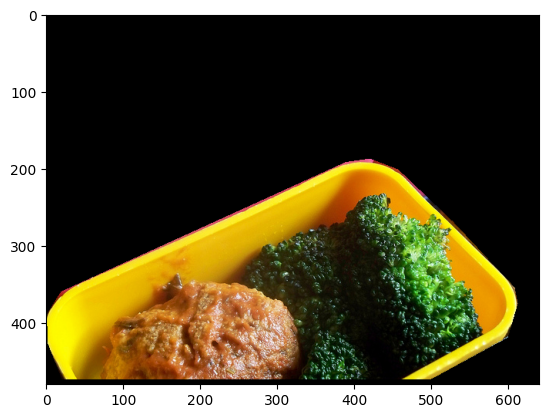

In [97]:
mask = masks.data[0]
mask = mask.reshape((mask.shape[0], mask.shape[1], 1))
mask = mask.repeat((1,1,3))
plt.imshow(np.array(img) * mask.numpy())

In [20]:
import pycocotools
from pycocotools.coco import COCO
annFile = ANNOTATIONS_PATH 
coco=COCO(annFile)

loading annotations into memory...
Done (t=21.64s)
creating index...
index created!


In [23]:
coco.loadImgs(coco.getImgIds(catIds=[90])[:3]), coco.loadCats([90])

([{'license': 1,
   'file_name': '000000354306.jpg',
   'coco_url': 'http://images.cocodataset.org/train2017/000000354306.jpg',
   'height': 640,
   'width': 426,
   'date_captured': '2013-11-15 03:10:38',
   'flickr_url': 'http://farm8.staticflickr.com/7062/6893143985_fe0c0ed081_z.jpg',
   'id': 354306},
  {'license': 2,
   'file_name': '000000204804.jpg',
   'coco_url': 'http://images.cocodataset.org/train2017/000000204804.jpg',
   'height': 427,
   'width': 640,
   'date_captured': '2013-11-15 03:19:29',
   'flickr_url': 'http://farm8.staticflickr.com/7055/6945089703_393d186894_z.jpg',
   'id': 204804},
  {'license': 5,
   'file_name': '000000464902.jpg',
   'coco_url': 'http://images.cocodataset.org/train2017/000000464902.jpg',
   'height': 480,
   'width': 640,
   'date_captured': '2013-11-21 19:53:15',
   'flickr_url': 'http://farm2.staticflickr.com/1425/929688150_13f9f1efe3_z.jpg',
   'id': 464902}],
 [{'supercategory': 'indoor', 'id': 90, 'name': 'toothbrush'}])

(mask[0] > 0).shape

In [88]:
imgIds = coco.getImgIds(catIds=[90])[:5]
annIds = coco.getAnnIds(imgIds=imgIds, catIds=[90], iscrowd=None)
anns = coco.loadAnns(annIds)
[(ann['image_id'], ann['category_id']) for ann in anns], imgIds
# [k for k in anns[0]], anns[0]['image_id']

([(354306, 90),
  (354306, 90),
  (204804, 90),
  (204804, 90),
  (464902, 90),
  (464902, 90),
  (464902, 90),
  (464902, 90),
  (464902, 90),
  (393223, 90),
  (176136, 90)],
 [354306, 204804, 464902, 393223, 176136])

In [93]:
sorted(anns, key=lambda x: x['image_id'])
anns 

[{'segmentation': [[234.6,
    502.99,
    239.84,
    510.51,
    240.51,
    509.97,
    246.43,
    520.86,
    248.58,
    523.14,
    254.35,
    524.75,
    248.31,
    516.15,
    242.8,
    508.76,
    242.93,
    505.94,
    236.75,
    499.36,
    235.01,
    497.88,
    233.39,
    498.15,
    232.99,
    499.76,
    234.33,
    502.18,
    235.68,
    504.06]],
  'area': 119.12340000000025,
  'iscrowd': 0,
  'image_id': 354306,
  'bbox': [232.99, 497.88, 21.36, 26.87],
  'category_id': 90,
  'id': 342845},
 {'segmentation': [[220.04,
    530.0,
    223.87,
    532.33,
    226.3,
    528.73,
    228.86,
    516.54,
    230.37,
    513.29,
    231.41,
    510.04,
    233.04,
    503.77,
    232.92,
    498.78,
    236.05,
    497.85,
    234.89,
    496.34,
    233.39,
    496.11,
    231.18,
    501.33,
    230.02,
    504.35,
    223.29,
    522.11,
    220.62,
    529.77]],
  'area': 124.9125000000001,
  'iscrowd': 0,
  'image_id': 354306,
  'bbox': [220.04, 496.11, 16.01,

('000000001234',
 ['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [94]:
mask = coco.annToMask(anns[0])
img_id = anns[0]['image_id']
# for i in range(len(anns)):
#     if anns[i]['image_id'] == img_id:
#         mask += coco.annToMask(anns[i])
# plt.imshow(mask)
img_id

354306

In [113]:
import pycocotools
from pycocotools.coco import COCO
from copy import deepcopy
import random 
from functools import  lru_cache   
from PIL import Image 
import numpy as np 

annFile = ANNOTATIONS_PATH 
coco=COCO(annFile)



class COCOPrompter(object):
    def __init__(self, annFile, shot=5, mask_rate=0.25):
        self.coco = COCO(annFile) 
        self.shot = shot
        self.mask_rate =  mask_rate
        
        
        # init start index for each category
        catIds = self.coco.getCatIds()
        self.start_idx = dict()
        for i in catIds:
            self.start_idx[i] = 0

        self.catIds = catIds.copy()
    
    def get_cat_mask(self, catIds):
        """ 
            mask some categories with mask_rate

            return: new catIds with mask 

            e.g.
                cat_mask: [1, 1, 1, 0]
                catIds: [1, 30, 9, 4]
                category 4 is masked
        """     
        masked_num = int(mask_rate * len(catIds))
        if masked_num < 1:
            return [1 for _ in range(len(catIds))] 
        else: 
            mask_idx = random.sample(range(len(catIds)), masked_num)  
            mask = [1 for _ in range(len(catIds))]
            for i in mask_ids:
                mask[i] = 0
            return mask 

    def replace_masked_cat_with_other(self, catIds, mask):
        """ 
            mask: see self.get_cat_mask()
            e.g.
                cat_mask: [1, 1, 1, 0]
                catIds: [1, 30, 9, 4]
                category 4 is masked
                4 will be replaced with other category not in [1, 30, 9]
        """
        random.shuffle(self.catIds)
        # count mask:
        mask_num = len(mask) - sum(mask)
        
        if mask_num <= 0:
            # no need to replace
            return catIds 
        else: 
            ans = []
            for cat in self.catIds: 
                if cat not in catIds:
                    ans.append(cat)
                    if len(ans) == mask_num:
                        break
            
            j = 0
            for i in range(len(catIds)):
                if mask[i] == 0: 
                    catIds[i] = ans[j]
                    j += 1 
            return catIds 
            
    @lru_cache(maxsize=50)
    def imread(self, imgId):
        if isinstance(imgId, int):
            imgId = str(imgId) 
        imgId = imgId.zfill(12) + ".jpg"
        return np.array(Image.open(imgId))

    def get_instances_from_idx(self, idx: list,  catId: int):
        """ 
            idx: imgIds, N-shot images of category catId
            we need to random sample N-shot instances from N-shot images of category catId
            anns: [
                dict(
                    'segmentation',
                    'area',
                    'iscrowd',
                    'image_id',
                    'bbox',
                    'category_id',
                    'id'
                )
            ]
            idx: [int]
        """
        annIds = coco.getAnnIds(imgIds=idx, catIds=[catId], iscrowd=None)
        anns = coco.loadAnns(annIds) 
        samples_idx = random.sample(range(len(anns)), self.shot) 
        
        anns_new = []
        for i in samples_idx:
            anns_new.append(anns[i])
        idx_new = list(set([ann['image_id'] for ann in anns_new])) 
        
        # load imgs:
        imgs = dict() 
        for imgId in idx_new:
            imgs[imgId] = self.imread(imgId)
        
        # crop imgs:
        for ann in anns_new: 
            imgId = ann['image_id']
            mask = self.coco.annToMask(ann)  # binary numpy mask
            img = imgs[imgId]    # numpy array
            bbox = ann['box']



    def get_n_shot_idx(self, catIds: list):
        """ 
            get N-shot image path for each category in catIds

            n_shot_idx: type is [[]]
            sample N-shot imgIds from coco.getImgIds(catIds=catIds)
        """
        n_shot_idx = []
        for cat in catIds:
            start_idx = self.start_idx[cat] 
            ImgIds = coco.getImgIds(catIds=[cat])

            
            len_ImgIds = len(ImgIds) 
            end_idx = start_idx + self.shot 

            idx = []
            if end_idx >= len_ImgIds:
                for i in range(self.shot):
                    idx.append(ImgIds[(start_idx + i) % len_ImgIds])
            else: 
                idx = ImgIds[start_idx: end_idx]
            
            
            n_shot_idx.append(idx)

            # update start index:
            self.start_idx[cat] += 1
            self.start_idx[cat] = self.start_idx[cat] % len_ImgIds
        
        return n_shot_idx 

    def get_img_paths(self, n_shot_idx):
        """ 
            metas:
                [{'license': 1,
                'file_name': '000000354306.jpg',
                'coco_url': 'http://images.cocodataset.org/train2017/000000354306.jpg',
                'height': 640,
                'width': 426,
                'date_captured': '2013-11-15 03:10:38',
                'flickr_url': 'http://farm8.staticflickr.com/7062/6893143985_fe0c0ed081_z.jpg',
                'id': 354306}, ...]
        """
        paths = []
        for ImgIdx in n_shot_idx:
            metas = self.coco.loadImgs(ImgIdx)
    def prompt(self, catIds: list, masked=True):
        # get unique category ids:
        catIds = list(set(catIds))
        index = self.coco.getImgIds(catIds=catIds)

        if masked:
            # get mask_rate number of images prompt that not in catIds:
            catMask = self.get_cat_mask(catIds)
        else:
            catMask = [1 for _ in range(len(catIds))]
        # replace masked category with other categories:
        catIds = self.replace_masked_cat_with_other(catIds, catMask)

        n_shot_idx = self.get_n_shot_idx(catIds)
        
        
        
        

1

In [29]:
import random 
a = [1,2,3,4]
random.shuffle(a)
a

[4, 1, 2, 3]

In [31]:
random.sample([12,2,4566,213, 1,3,4],3)

[2, 1, 213]

In [59]:
from PIL import Image 
import numpy as np 
@lru_cache
def imread():
    img = Image.open('/root/yunzhi/data/participant_property/images/0b4ef250500b65a556168f307fbf97f5.jpg')
    return img 


In [62]:
for _ in range(1000):
    imread()

In [48]:
random.randint(0, 5)

1